<a href="https://colab.research.google.com/github/nescoba/portafolio/blob/main/analysis_of_bookmakers_odds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
data = pd.read_csv('USA.csv')

data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,USA,MLS,2012,10/03/2012,23:00,Colorado Rapids,Columbus Crew,2,0,H,2.06,3.40,4.11,2.13,3.40,4.11,2.01,3.19,3.65
1,USA,MLS,2012,10/03/2012,23:00,Vancouver Whitecaps,Club de Foot Montreal,2,0,H,2.04,3.44,4.11,2.04,3.44,4.11,1.97,3.27,3.70
2,USA,MLS,2012,11/03/2012,00:30,DC United,Sporting Kansas City,0,1,A,2.57,3.31,3.04,2.60,3.60,3.04,2.46,3.11,2.81
3,USA,MLS,2012,11/03/2012,03:30,Los Angeles Galaxy,Real Salt Lake,1,3,A,1.88,3.57,4.88,1.89,3.57,5.00,1.81,3.33,4.31
4,USA,MLS,2012,11/03/2012,03:30,San Jose Earthquakes,New England Revolution,1,0,H,1.83,3.65,4.95,1.91,3.68,5.00,1.82,3.36,4.23


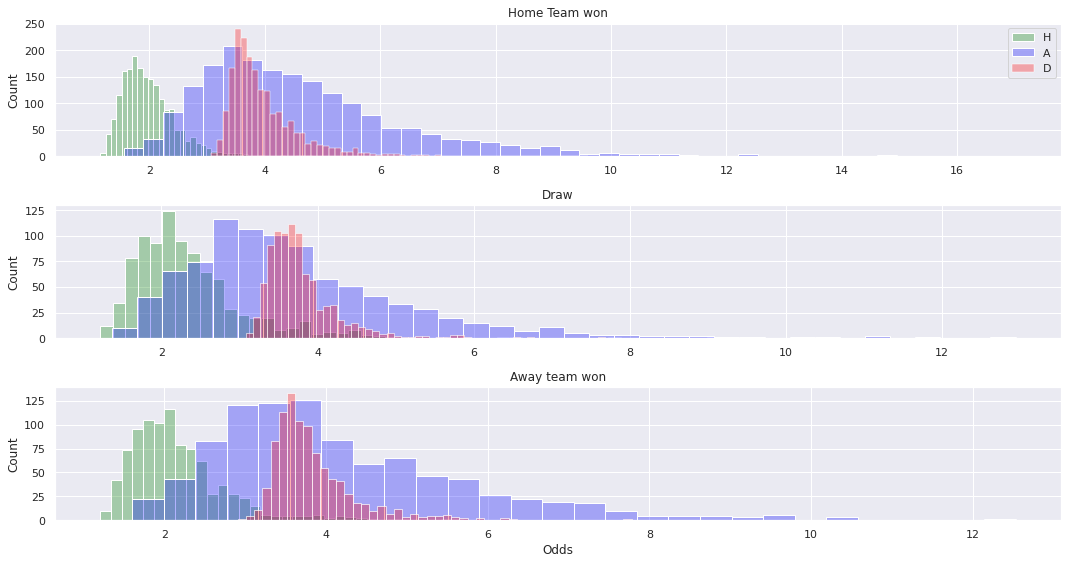

In [10]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(data[data['Res']=='H'], x='PH', ax=axs[0], color='green', alpha=0.3, label='H')
sns.histplot(data[data['Res']=='H'], x='PA', ax=axs[0], color='blue', alpha=0.3, label='A')
sns.histplot(data[data['Res']=='H'], x='PD', ax=axs[0], color='red', alpha=0.3, label='D')
axs[0].set_xlabel('')
axs[0].set_title('Home Team won')
axs[0].legend()

sns.histplot(data[data['Res']=='A'], x='PH', ax=axs[1], color='green', alpha=0.3)
sns.histplot(data[data['Res']=='A'], x='PA', ax=axs[1], color='blue', alpha=0.3)
sns.histplot(data[data['Res']=='A'], x='PD', ax=axs[1], color='red', alpha=0.3)
axs[1].set_xlabel('')
axs[1].set_title('Draw')

sns.histplot(data[data['Res']=='D'], x='PH', ax=axs[2], color='green', alpha=0.3)
sns.histplot(data[data['Res']=='D'], x='PA', ax=axs[2], color='blue', alpha=0.3)
sns.histplot(data[data['Res']=='D'], x='PD', ax=axs[2], color='red', alpha=0.3)
axs[2].set_xlabel('Odds')
axs[2].set_title('Away team won')


plt.tight_layout()

- Notice the shape of the distributions, they're very skewed to the right. How should one interpret that?
- This is not a figure that implies a very rational behaviour on the part of the bookies. 
    - They consistently give lower odds to the home team. They even did that when the result of the games was 'A'. 
        - This suggests there is often value in betting on the away team. 
    - They basically gave the same distribution of odds to draw whether the the game resulted on 'D' or 'A', showing that they cannot tell the difference in that particular bet. 


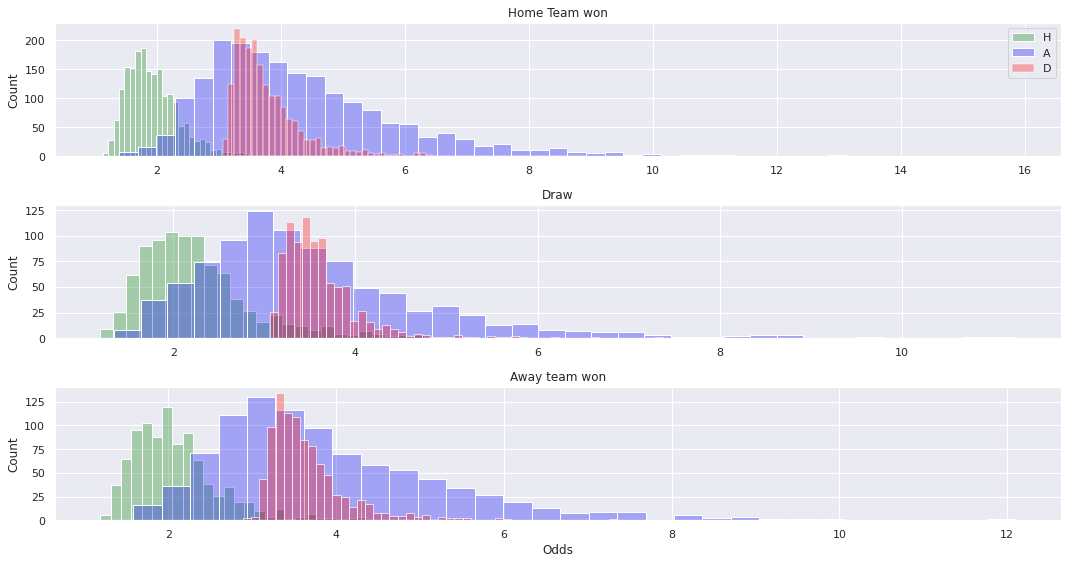

In [11]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(data[data['Res']=='H'], x='AvgH', ax=axs[0], color='green', alpha=0.3, label='H')
sns.histplot(data[data['Res']=='H'], x='AvgA', ax=axs[0], color='blue', alpha=0.3, label='A')
sns.histplot(data[data['Res']=='H'], x='AvgD', ax=axs[0], color='red', alpha=0.3, label='D')
axs[0].set_xlabel('')
axs[0].set_title('Home Team won')
axs[0].legend()

sns.histplot(data[data['Res']=='A'], x='AvgH', ax=axs[1], color='green', alpha=0.3)
sns.histplot(data[data['Res']=='A'], x='AvgA', ax=axs[1], color='blue', alpha=0.3)
sns.histplot(data[data['Res']=='A'], x='AvgD', ax=axs[1], color='red', alpha=0.3)
axs[1].set_xlabel('')
axs[1].set_title('Draw')

sns.histplot(data[data['Res']=='D'], x='AvgH', ax=axs[2], color='green', alpha=0.3)
sns.histplot(data[data['Res']=='D'], x='AvgA', ax=axs[2], color='blue', alpha=0.3)
sns.histplot(data[data['Res']=='D'], x='AvgD', ax=axs[2], color='red', alpha=0.3)
axs[2].set_xlabel('Odds')
axs[2].set_title('Away team won')


plt.tight_layout()

- The average odds tell the same story. 
- Notice how the histograms are skewed right, showing the bookmaker's tendency to offer lower odds rather than higher, as it is to be expected. However, the tails are all quite heavy. When the category matches the actual result of the game, these tails correspond to very high value bets. 

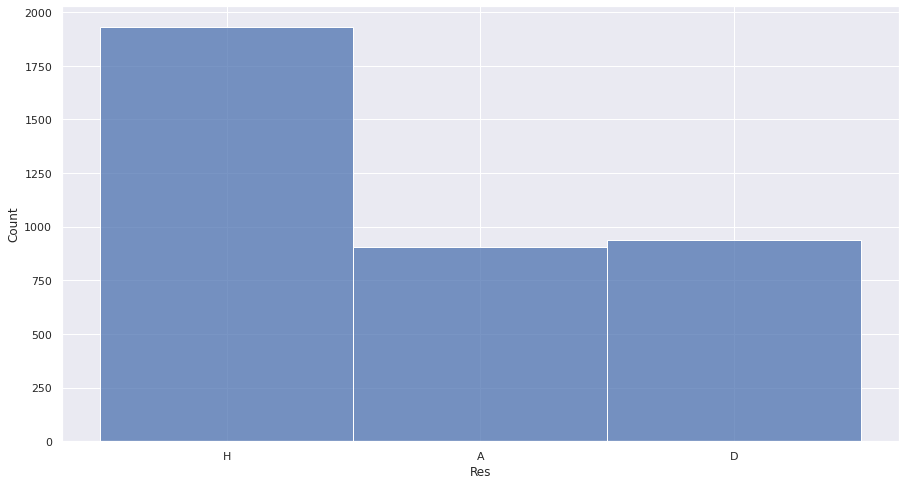

In [13]:
sns.histplot(data, x='Res')

- That's the elementary reason why home odds are so low: they happen almost twice as frequently as the next category. 
- Draws and Away vistories occur with almost the same frequency, against the intuition that draws should be rarer by chance. 

In [17]:
pd.cut(data['AvgH'], 10)

0       (1.834, 2.538]
1       (1.834, 2.538]
2       (1.834, 2.538]
3       (1.123, 1.834]
4       (1.123, 1.834]
             ...      
3767    (1.834, 2.538]
3768    (3.242, 3.946]
3769    (2.538, 3.242]
3770    (1.123, 1.834]
3771    (1.123, 1.834]
Name: AvgH, Length: 3772, dtype: category
Categories (10, interval[float64, right]): [(1.123, 1.834] < (1.834, 2.538] < (2.538, 3.242] <
                                            (3.242, 3.946] ... (5.354, 6.058] < (6.058, 6.762] <
                                            (6.762, 7.466] < (7.466, 8.17]]

In [40]:
# data.loc[:, 'AvgHCat'] = pd.cut(data['AvgH'], 30)

# counts = data.groupby('AvgHCat')['Res'].describe()

# counts

In [25]:
def implied_proba_interval(interval):
    return 1/interval.mid

v_implied_proba_interval = np.vectorize(implied_proba_interval)

In [41]:
# counts['impl_prob'] = v_implied_proba_interval(counts.index)

# counts

In [42]:
# counts.loc[:, 'obs_probs'] = counts['freq']/counts['count']

# counts

In [43]:
# data.loc[:, 'AvgDCat'] = pd.cut(data['AvgD'], 30)

# countsD = data.groupby('AvgDCat')['Res'].describe()

# countsD['impl_prob'] = v_implied_proba_interval(countsD.index)

# countsD.loc[:, 'obs_probs'] = countsD['freq']/countsD['count']

# countsD


In [35]:
for (interval, group) in data.groupby('AvgDCat'):
    print( (implied_proba_interval(interval), len(group[group['Res']=='D']) / len(group)))

(0.3348401138456387, 0.375)
(0.31357792411414237, 0.2772808586762075)
(0.29511583296443855, 0.2621359223300971)
(0.2787456445993031, 0.25183374083129584)
(0.2640612622128334, 0.2635814889336016)
(0.25084660729963626, 0.2046783625730994)
(0.2389200812328276, 0.1722488038277512)
(0.22805017103762829, 0.2926829268292683)
(0.2181262951248773, 0.16470588235294117)
(0.20905194940942823, 0.2553191489361702)
(0.20068231988761787, 0.2608695652173913)
(0.19295706705258078, 0.14285714285714285)
(0.185821796896776, 0.21739130434782608)
(0.17917935853789646, 0.14285714285714285)
(0.17299541562148604, 0.0)
(0.16723806338322603, 0.42857142857142855)
(0.1618384851917786, 0.0)
(0.15677667163126127, 0.0)
(0.15203344735841887, 0.0)
(0.14755791648221928, 0.0)


ZeroDivisionError: ignored

In [36]:
data.loc[:, 'AvgACat'] = pd.cut(data['AvgA'], 30)
for (interval, group) in data.groupby('AvgACat'):
    print( (implied_proba_interval(interval), len(group[group['Res']=='A']) / len(group)))

(0.7527286413248024, 0.5384615384615384)
(0.5470459518599563, 0.5137614678899083)
(0.4310344827586207, 0.3768996960486322)
(0.3556187766714083, 0.32094594594594594)
(0.3026634382566586, 0.2603719599427754)
(0.26343519494204426, 0.21428571428571427)
(0.23320895522388058, 0.1934673366834171)
(0.2092050209205021, 0.1574074074074074)
(0.1896813353566009, 0.16317991631799164)
(0.1734906315058987, 0.14201183431952663)
(0.159846547314578, 0.12149532710280374)
(0.14819205690574985, 0.13253012048192772)
(0.13812154696132597, 0.09259259259259259)
(0.12933264355923435, 0.03571428571428571)
(0.12159533073929961, 0.14705882352941177)
(0.11473152822395592, 0.18181818181818182)
(0.10860121633362294, 0.0)
(0.10309278350515465, 0.1111111111111111)
(0.09811616954474098, 0.0)
(0.09359790340696368, 0.16666666666666666)
(0.08947745168217609, 0.3333333333333333)
(0.08570449091532396, 0.0)
(0.08223684210526316, 0.0)


ZeroDivisionError: ignored

In [39]:
data.loc[:, 'AvgHCat'] = pd.cut(data['AvgH'], 30)
for (interval, group) in data.groupby('AvgHCat'):
    print( (implied_proba_interval(interval), len(group[group['Res']=='H']) / len(group)), len(group))

(0.8038585209003215, 0.7043478260869566) 115
(0.6747638326585695, 0.6546489563567363) 527
(0.5825808330905914, 0.5855745721271394) 818
(0.5124263387138099, 0.5092105263157894) 760
(0.4574565416285453, 0.47208931419457734) 627
(0.41313778145011365, 0.4381720430107527) 372
(0.3765769158350593, 0.3532110091743119) 218
(0.3460207612456747, 0.38596491228070173) 114
(0.3200512081933109, 0.3150684931506849) 73
(0.2976633427593392, 0.2916666666666667) 48
(0.2782415136338342, 0.13333333333333333) 30
(0.26119890296460757, 0.16666666666666666) 18
(0.2460932693490833, 0.18181818181818182) 11
(0.23266635644485806, 0.29411764705882354) 17
(0.22062879205736347, 0.4) 5
(0.2097535395909806, 0.2857142857142857) 7
(0.19992003198720512, 0.5) 2
(0.19096724911677648, 0.0) 2
(0.18276523805172254, 1.0) 2
(0.17525411847178407, 0.0) 1
(0.168335998653312, 0.0) 2


ZeroDivisionError: ignored